# Problem 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.multivariate.pca import PCA
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats.mstats import kruskalwallis


### 2.1 EDA

In [11]:
data= pd.read_csv('Income.csv')
data.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300


In [24]:
data.shape

(753, 14)

In [25]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
WorkingHoursWife,753.0,740.576361,871.314216,0.0000,0.0000,288.0000,1516.0000,4950.000
WifeAge,753.0,42.537849,8.072574,30.0000,36.0000,43.0000,49.0000,60.000
EducationWife,753.0,12.286853,2.280246,5.0000,12.0000,12.0000,13.0000,17.000
WifeHourEarnings,753.0,2.374565,3.241829,0.0000,0.0000,1.6250,3.7879,25.000
WifeWage,753.0,1.849734,2.419887,0.0000,0.0000,0.0000,3.5800,9.980
WorkingHoursHusband,753.0,2267.270916,595.566649,175.0000,1928.0000,2164.0000,2553.0000,5010.000
HusbandAge,753.0,45.120850,8.058793,30.0000,38.0000,46.0000,52.0000,60.000
EducationHusband,753.0,12.491368,3.020804,3.0000,11.0000,12.0000,15.0000,17.000
HusbandWage,753.0,7.482179,4.230559,0.4121,4.7883,6.9758,9.1667,40.509
EducationWifeMother,753.0,9.250996,3.367468,0.0000,7.0000,10.0000,12.0000,17.000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
WorkingHoursWife       753 non-null int64
WifeAge                753 non-null int64
EducationWife          753 non-null int64
WifeHourEarnings       753 non-null float64
WifeWage               753 non-null float64
WorkingHoursHusband    753 non-null int64
HusbandAge             753 non-null int64
EducationHusband       753 non-null int64
HusbandWage            753 non-null float64
EducationWifeMother    753 non-null int64
EducationWifeFather    753 non-null int64
UnemploymentRate       753 non-null float64
WifeExperience         753 non-null int64
FamilyIncome           753 non-null int64
dtypes: float64(4), int64(10)
memory usage: 82.5 KB


In [27]:
data.isnull().sum()

WorkingHoursWife       0
WifeAge                0
EducationWife          0
WifeHourEarnings       0
WifeWage               0
WorkingHoursHusband    0
HusbandAge             0
EducationHusband       0
HusbandWage            0
EducationWifeMother    0
EducationWifeFather    0
UnemploymentRate       0
WifeExperience         0
FamilyIncome           0
dtype: int64

In [28]:
dups = data.duplicated()
dups.value_counts()

False    753
dtype: int64

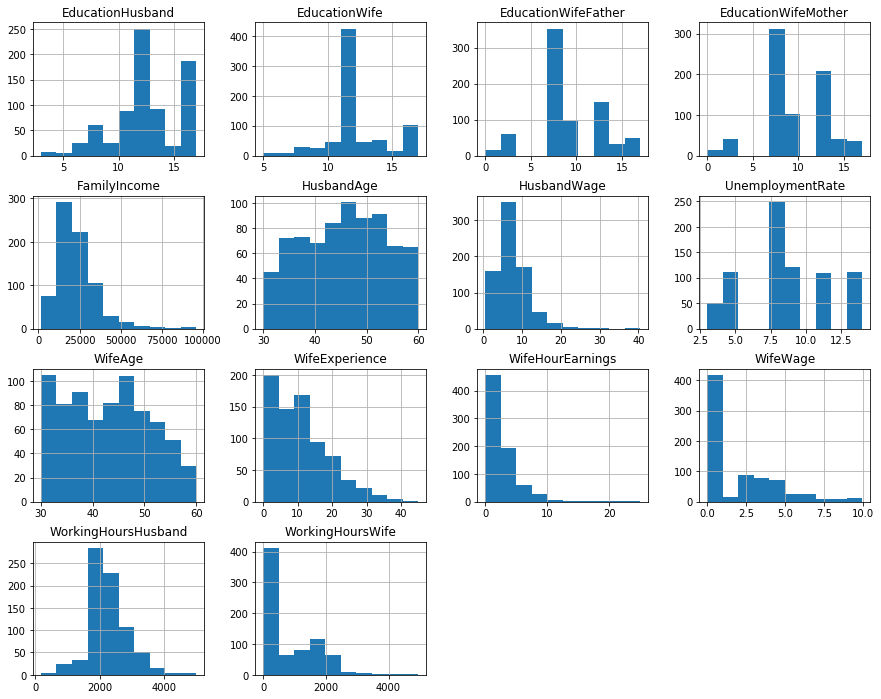

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,12

data.hist();

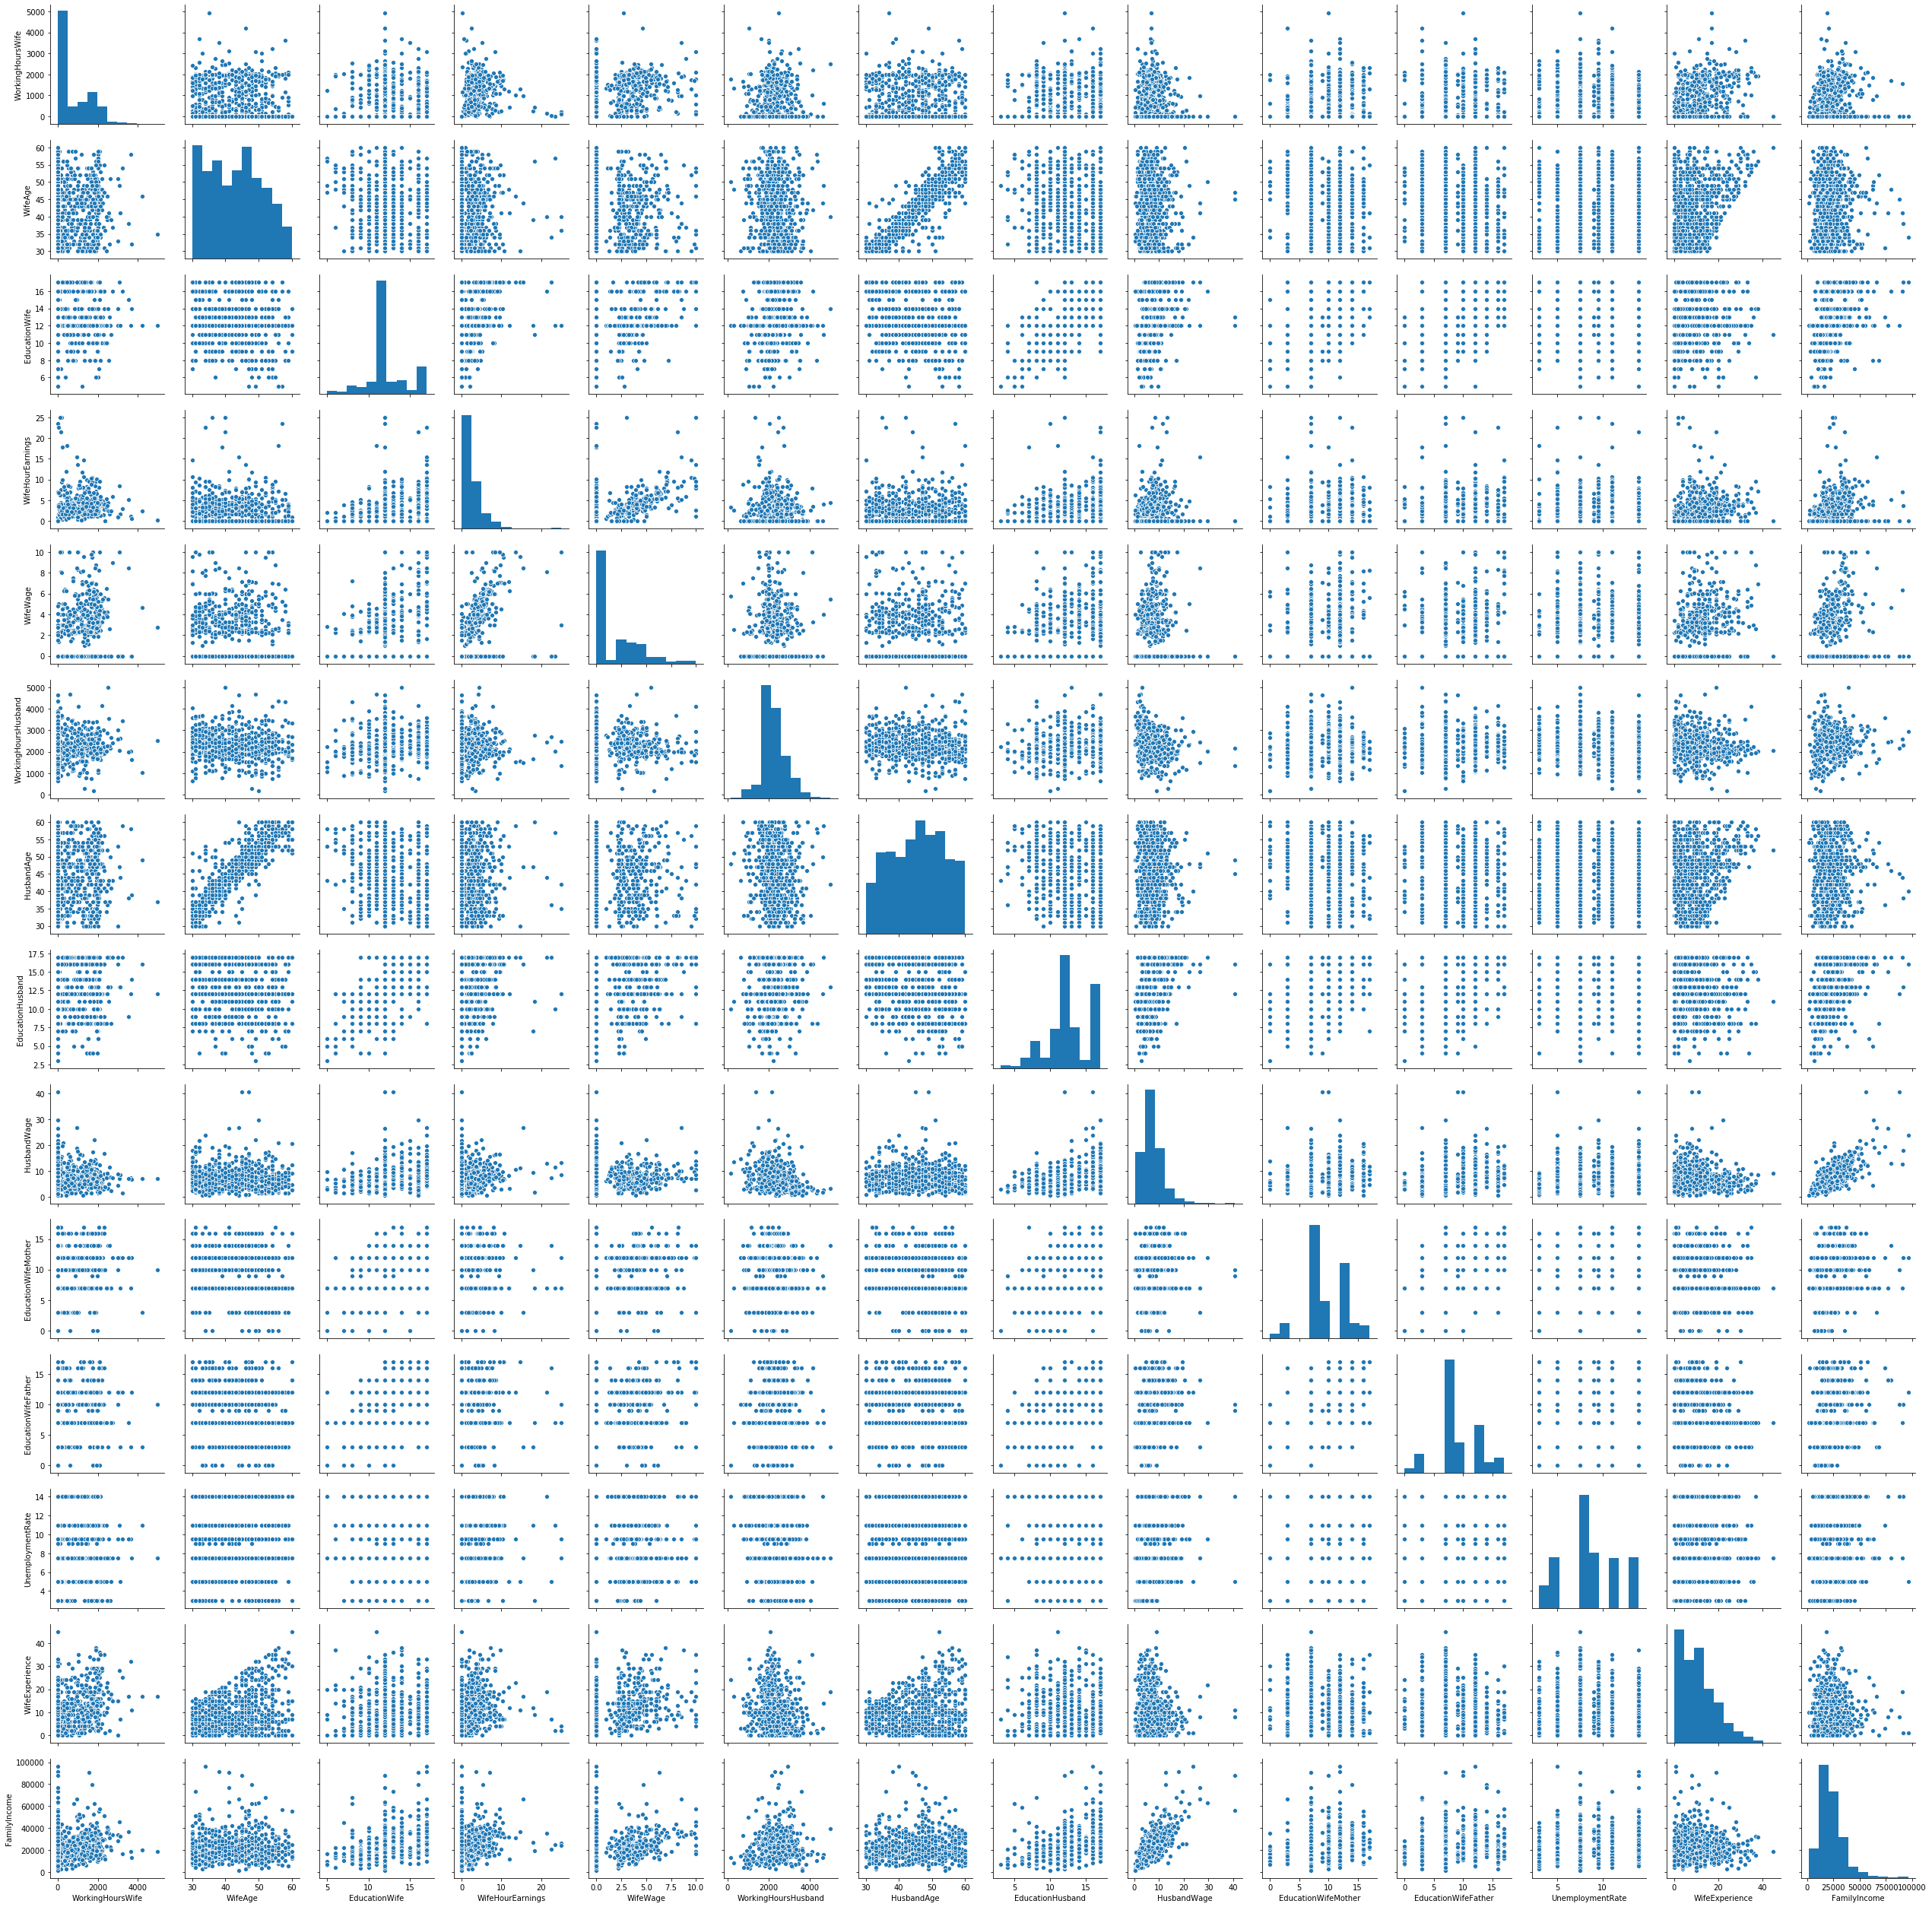

In [74]:
sns.pairplot(data)

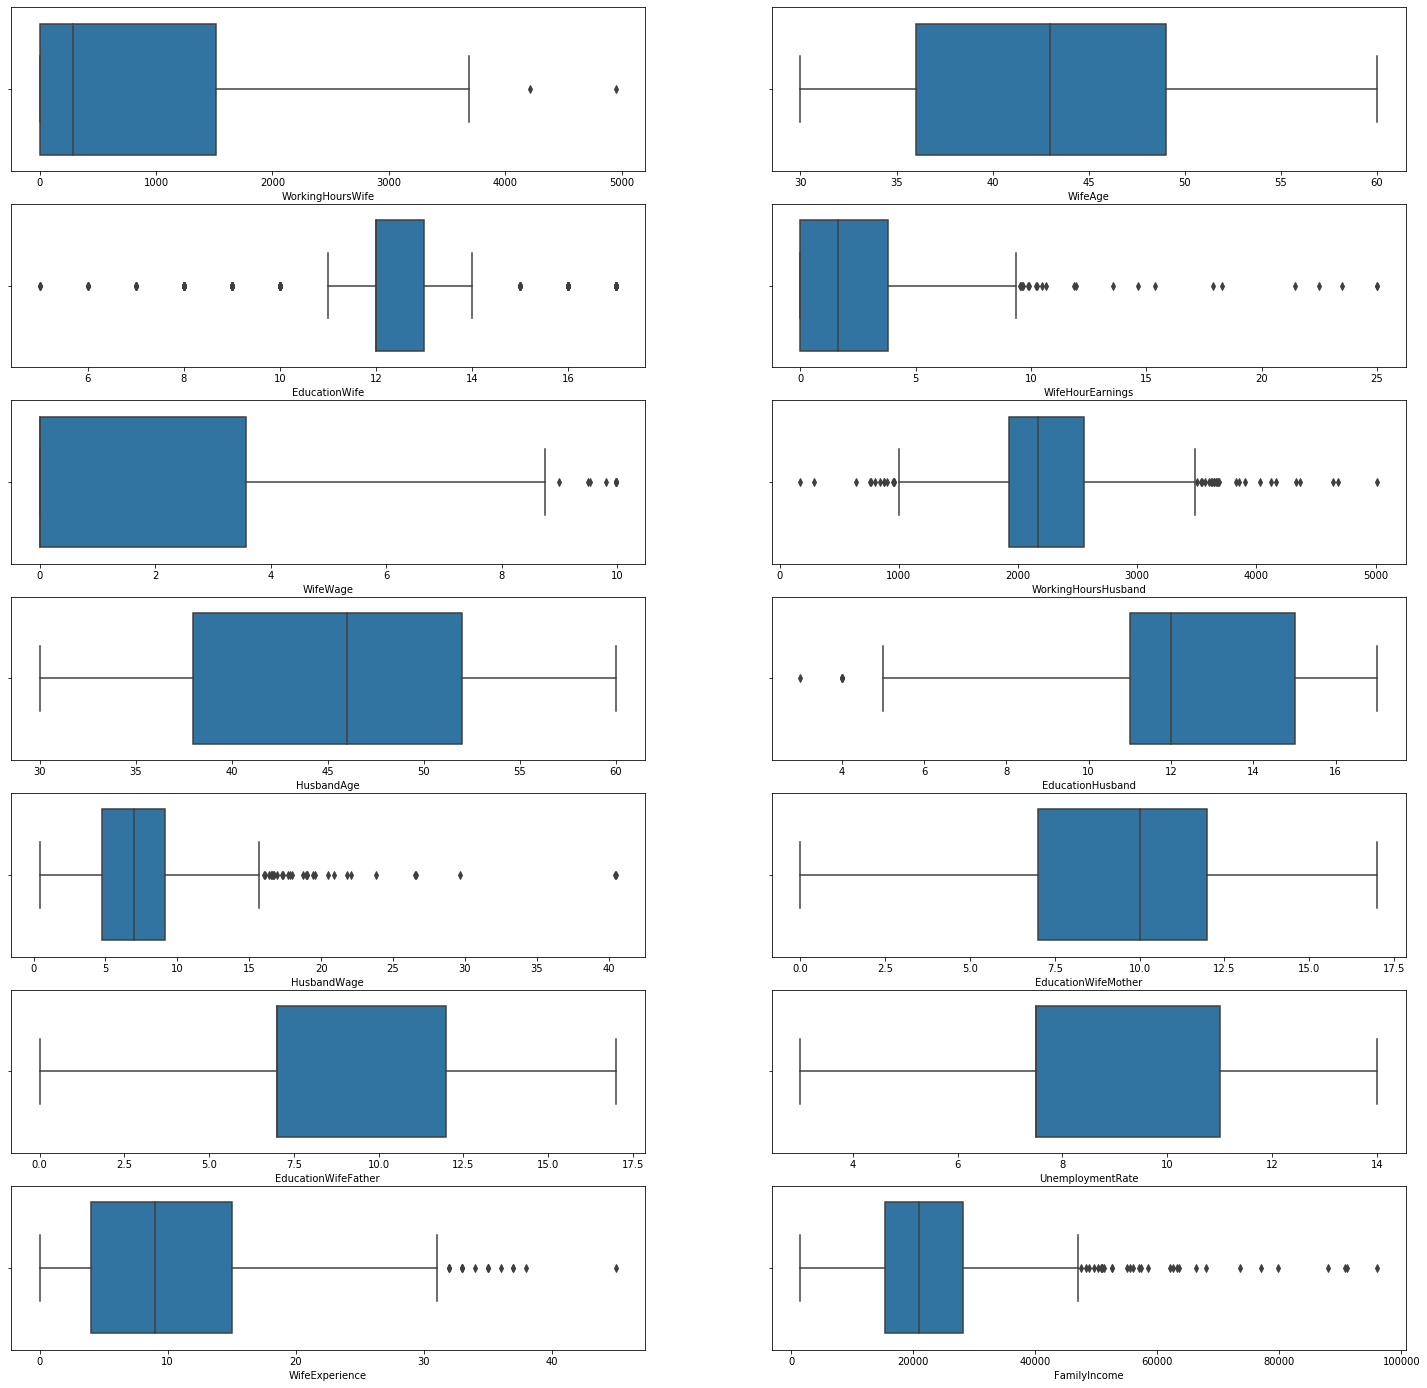

In [75]:
fig = plt.figure(figsize=(25,50))
for i in range(0,len(data.columns)):
    ax=fig.add_subplot(14,2,i+1)
    sns.boxplot(data[data.columns[i]])

### Data Preprocessing

In [76]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

WorkingHoursWife        1516.0000
WifeAge                   13.0000
EducationWife              1.0000
WifeHourEarnings           3.7879
WifeWage                   3.5800
WorkingHoursHusband      625.0000
HusbandAge                14.0000
EducationHusband           4.0000
HusbandWage                4.3784
EducationWifeMother        5.0000
EducationWifeFather        5.0000
UnemploymentRate           3.5000
WifeExperience            11.0000
FamilyIncome           12772.0000
dtype: float64


In [3]:
z = np.abs(stats.zscore(data))
data1= data[(z <=3).all(axis=1)]

In [7]:
data1.shape

(695, 14)

In [8]:
data1

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,40,13,0.0000,0.00,3020,43,16,9.2715,10,10,9.5,5,28200
749,0,31,12,0.0000,0.00,2056,33,12,4.8638,12,12,7.5,14,10000
750,0,43,12,0.0000,0.00,2383,43,12,1.0898,10,3,7.5,4,9952
751,0,60,12,0.0000,0.00,1705,55,8,12.4400,12,12,14.0,15,24984


### 2.2 Multicollinearity Test

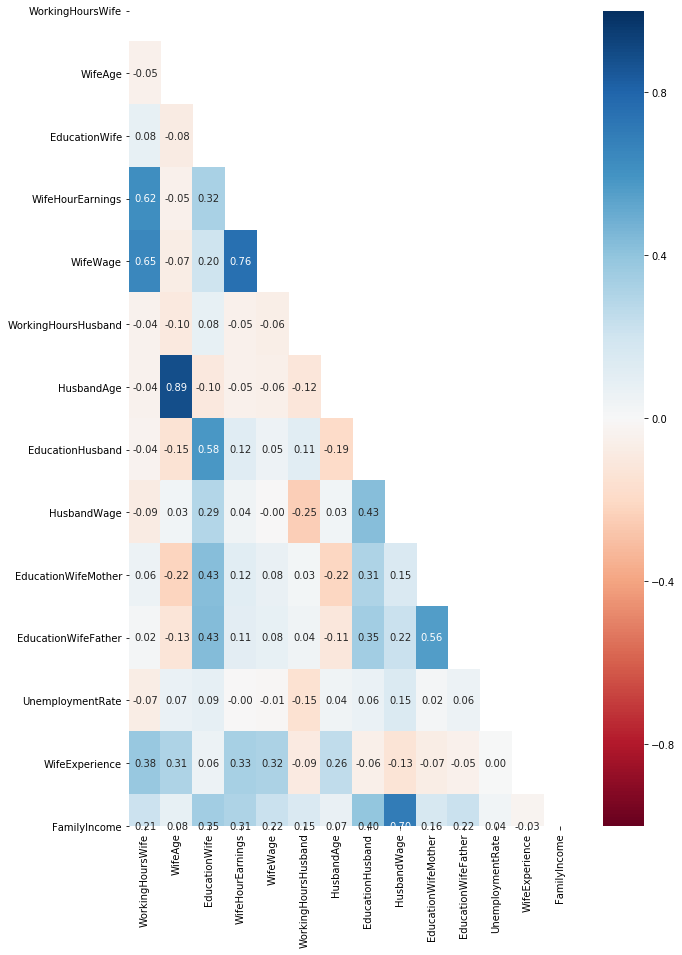

In [33]:
corr=data1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 15))
sns.heatmap(data1.corr(), fmt='.2f',cmap='RdBu',vmin=-1,vmax=1,mask=mask,annot=True)
plt.show()

In [6]:
data1.iloc[:,0:-1].corr()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
WorkingHoursWife,1.000000,-0.051743,0.082185,0.622153,0.651341,-0.042942,-0.044541,-0.035805,-0.085783,0.058337,0.019215,-0.070556,0.380770
WifeAge,-0.051743,1.000000,-0.082791,-0.051393,-0.070880,-0.096374,0.886418,-0.147379,0.031886,-0.222650,-0.127291,0.067142,0.309451
EducationWife,0.082185,-0.082791,1.000000,0.324682,0.203984,0.080954,-0.104212,0.578363,0.289947,0.425131,0.432806,0.085959,0.057101
WifeHourEarnings,0.622153,-0.051393,0.324682,1.000000,0.755982,-0.053561,-0.049280,0.118965,0.044674,0.115723,0.107123,-0.000132,0.331096
WifeWage,0.651341,-0.070880,0.203984,0.755982,1.000000,-0.064824,-0.058363,0.053169,-0.000300,0.076282,0.080543,-0.013151,0.319035
WorkingHoursHusband,-0.042942,-0.096374,0.080954,-0.053561,-0.064824,1.000000,-0.118282,0.111499,-0.248012,0.027230,0.039233,-0.148475,-0.088693
HusbandAge,-0.044541,0.886418,-0.104212,-0.049280,-0.058363,-0.118282,1.000000,-0.189464,0.032127,-0.218707,-0.110835,0.042483,0.256120
EducationHusband,-0.035805,-0.147379,0.578363,0.118965,0.053169,0.111499,-0.189464,1.000000,0.425542,0.310458,0.345494,0.064311,-0.057543
HusbandWage,-0.085783,0.031886,0.289947,0.044674,-0.000300,-0.248012,0.032127,0.425542,1.000000,0.150910,0.221272,0.147394,-0.133609
EducationWifeMother,0.058337,-0.222650,0.425131,0.115723,0.076282,0.027230,-0.218707,0.310458,0.150910,1.000000,0.558807,0.019736,-0.074331


### 2.3 Multiple Linear Regression model

In [80]:
X=data1.drop('FamilyIncome',axis=1)
Y=data1['FamilyIncome']
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sat, 20 Feb 2021   Prob (F-statistic):          1.55e-180
Time:                        14:17:27   Log-Likelihood:                -6916.5
No. Observations:                 695   AIC:                         1.386e+04
Df Residuals:                     681   BIC:                         1.392e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.049e+04   2038.049    -10.054      0.000   -2.45e+04   -1.65e+04
WorkingHoursWife        2.5356      0.337      7.516      0.000       1.873       3.198
WifeAge               148.9450     54.883      2.714      0.007      41.184     256.706
EducationWife         114.0232    126.304      0.903      0.367    -133.970     362.016
WifeHourEarnings      712.3784    133.194      5.348      0.000     450.859     973.898
WifeWage              -19.6182    146.834     -0.134      0.894    -307.921     268.684
WorkingHoursHusband     6.4166      0.388     16.541      0.000       5.655       7.178
HusbandAge             33.5834     53.328      0.630      0.529     -71.123     138.290
EducationHusband       48.7249     90.140      0.541      0.589    -128.261     225.710
HusbandWage          2221.1076     70.275     31.606      0.000    2083.125    2359.090
EducationWifeMother    40.2344     74.190      0.542      0.588    -105.434     185.903
EducationWifeFather    19.6868     70.343      0.280      0.780    -118.429     157.803
UnemploymentRate      -66.6494     64.310     -1.036      0.300    -192.919      59.621
WifeExperience        -94.4798     30.644     -3.083      0.002    -154.648     -34.311
==============================================================================
Omnibus:                      165.961   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.818
Skew:                           1.267   Prob(JB):                     3.34e-83
Kurtosis:                       5.587   Cond. No.                     2.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
ypred = model.predict(X)
print(ypred)

0      19078.498082
1      24713.569856
2      22732.428115
3       9787.446302
4      29066.018483
           ...     
748    28637.204143
749    10079.141497
750     6605.246300
751    28990.090627
752    20638.631714
Length: 695, dtype: float64


In [82]:
from sklearn import metrics
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y,ypred)))

RMSE: 5079.037352292563


### 2.4 PCA

In [83]:
from scipy.stats import zscore #Scaling
data1_scaled=data1.drop(['FamilyIncome'],axis =1).apply(zscore)
data1_scaled.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,1.093541,-1.294315,-0.107495,0.524951,0.443267,0.810073,-1.361120,-0.155443,-0.923598,0.823049,-0.514417,-1.143030,0.486207
1,1.149369,-1.546962,-0.107495,-0.282139,0.443267,0.081828,-1.860580,-1.181070,0.392183,-0.676739,-0.514417,0.788656,-0.698994
2,1.542597,-0.915345,-0.107495,1.014315,1.082884,1.476106,-0.611929,-0.155443,-1.057210,0.823049,-0.514417,-1.143030,0.617896
3,-0.307027,-1.041668,-0.107495,-0.402232,0.719361,-0.631778,1.011318,-0.839194,-1.068839,-0.676739,-0.514417,-1.143030,-0.567305
4,1.042567,-1.420638,0.820564,1.033331,0.880415,-0.485397,-1.610850,-0.155443,0.856857,0.823049,1.487695,0.305735,-0.435616


In [84]:
cov_matrix = np.cov(data1_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00144092e+00 -5.18177059e-02  8.23031524e-02  6.23049172e-01
   6.52279432e-01 -4.30043763e-02 -4.46054873e-02 -3.58562525e-02
  -8.59066586e-02  5.84209058e-02  1.92428439e-02 -7.06577625e-02
   3.81318991e-01]
 [-5.18177059e-02  1.00144092e+00 -8.29106115e-02 -5.14670478e-02
  -7.09818700e-02 -9.65128333e-02  8.87695487e-01 -1.47591478e-01
   3.19316755e-02 -2.22970787e-01 -1.27474770e-01  6.72388182e-02
   3.09896659e-01]
 [ 8.23031524e-02 -8.29106115e-02  1.00144092e+00  3.25150322e-01
   2.04277716e-01  8.10709000e-02 -1.04362085e-01  5.79196764e-01
   2.90365198e-01  4.25743302e-01  4.33430067e-01  8.60823751e-02
   5.71827918e-02]
 [ 6.23049172e-01 -5.14670478e-02  3.25150322e-01  1.00144092e+00
   7.57071421e-01 -5.36378965e-02 -4.93508100e-02  1.19136829e-01
   4.47383439e-02  1.15889595e-01  1.07277316e-01 -1.32466548e-04
   3.31572835e-01]
 [ 6.52279432e-01 -7.09818700e-02  2.04277716e-01  7.57071421e-01
   1.00144092e+00 -6.49171740e-02 -5.8446660

In [85]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [2.96032013 2.50724332 1.88150263 1.21705428 0.92892317 0.88797022
 0.66682963 0.10879119 0.49982269 0.22967016 0.43049187 0.37232667
 0.32778602]


Eigen Vectors 
 %s [[ 2.74769967e-01 -4.17338931e-01 -1.88537780e-01  3.45122823e-02
  -3.55918514e-02  4.62070532e-02 -1.06938582e-01  1.30202070e-02
  -2.99978277e-01 -1.24581374e-02 -2.62073338e-01  4.90052074e-01
   5.47365683e-01]
 [-2.22393605e-01 -2.89364934e-01  5.19051194e-01 -2.24515245e-01
  -7.17845976e-05  1.38275291e-02 -1.45392506e-01  7.12193339e-01
   5.22162501e-02 -1.62940115e-02 -7.41359551e-02  8.74047271e-02
  -4.80675190e-02]
 [ 4.14237242e-01  1.04792284e-01  2.42074147e-01 -1.72302675e-01
   1.64740718e-01 -1.13963907e-01  1.37455738e-01  1.96348176e-03
   5.53742215e-01  2.09975523e-01  6.74393983e-02 -1.93156359e-01
   5.26816056e-01]
 [ 3.76528413e-01 -3.73690468e-01 -7.95890867e-02  6.23032421e-02
   1.06641477e-01 -2.24486365e-02 -2.09921106e-01 -4.08694691e-03
   2.07479417e-01 -7.14264506

In [86]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.73892828  41.99766504  56.4499376   65.79842313  72.93370457
  79.75441663  84.87649484  88.7157527   92.02246394  94.88239432
  97.40019728  99.16434883 100.        ]


In [87]:
print("\nncomp",np.where(np.cumsum([( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)])>70.0)[0][0]+1)


ncomp 5


In [88]:
pc = PCA(data1.drop(['FamilyIncome'],axis =1),ncomp=5)

In [89]:
pc.loadings.T

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.274770,0.222394,-0.414237,-0.376528,-0.343131,-0.016104,0.227446,-0.342966,-0.185147,-0.347119,-0.336282,-0.030502,-0.074391
comp_1,0.417339,0.289365,-0.104792,0.373690,0.395290,-0.110839,0.288204,-0.229956,-0.157980,-0.208818,-0.195749,-0.031783,0.423201
comp_2,0.188538,-0.519051,-0.242074,0.079589,0.136349,0.197802,-0.506635,-0.230903,-0.385772,-0.086745,-0.195954,-0.234601,-0.112304
comp_3,-0.034512,0.224515,0.172303,-0.062303,-0.095245,0.665030,0.209644,0.076242,-0.375374,0.173568,0.197777,-0.427303,0.144904
comp_4,0.035592,0.000072,-0.164741,-0.106641,-0.058789,-0.298247,0.035592,-0.456048,-0.344651,0.530920,0.462318,0.192395,0.084585


In [90]:
pc.factors.head()


,comp_0,comp_1,comp_2,comp_3,comp_4
0,-0.024398,0.008031,0.068941,0.026371,0.003703
1,-0.007002,-0.007226,0.061349,-0.057136,-0.005086
2,-0.030316,0.030847,0.063491,0.048648,-0.003724
3,0.022343,0.011443,0.028643,0.001062,0.004640
4,-0.063105,-0.011867,0.027046,-0.038278,0.029523


In [91]:
pc.factors=sm.add_constant(pc.factors)
pc.factors.head()

,const,comp_0,comp_1,comp_2,comp_3,comp_4
0,1.0,-0.024398,0.008031,0.068941,0.026371,0.003703
1,1.0,-0.007002,-0.007226,0.061349,-0.057136,-0.005086
2,1.0,-0.030316,0.030847,0.063491,0.048648,-0.003724
3,1.0,0.022343,0.011443,0.028643,0.001062,0.004640
4,1.0,-0.063105,-0.011867,0.027046,-0.038278,0.029523


In [92]:
pc.factors.rename(columns = {'comp_0':'Wife education & Earnings', 'comp_1':'wife career', 
                              'comp_2':'Couple Age', 'comp_3':'Husband Working hrs','comp_4':'Education'}, inplace = True) 
pc.factors.head()

,const,Wife education & Earnings,wife career,Couple Age,Husband Working hrs,Education
0,1.0,-0.024398,0.008031,0.068941,0.026371,0.003703
1,1.0,-0.007002,-0.007226,0.061349,-0.057136,-0.005086
2,1.0,-0.030316,0.030847,0.063491,0.048648,-0.003724
3,1.0,0.022343,0.011443,0.028643,0.001062,0.004640
4,1.0,-0.063105,-0.011867,0.027046,-0.038278,0.029523


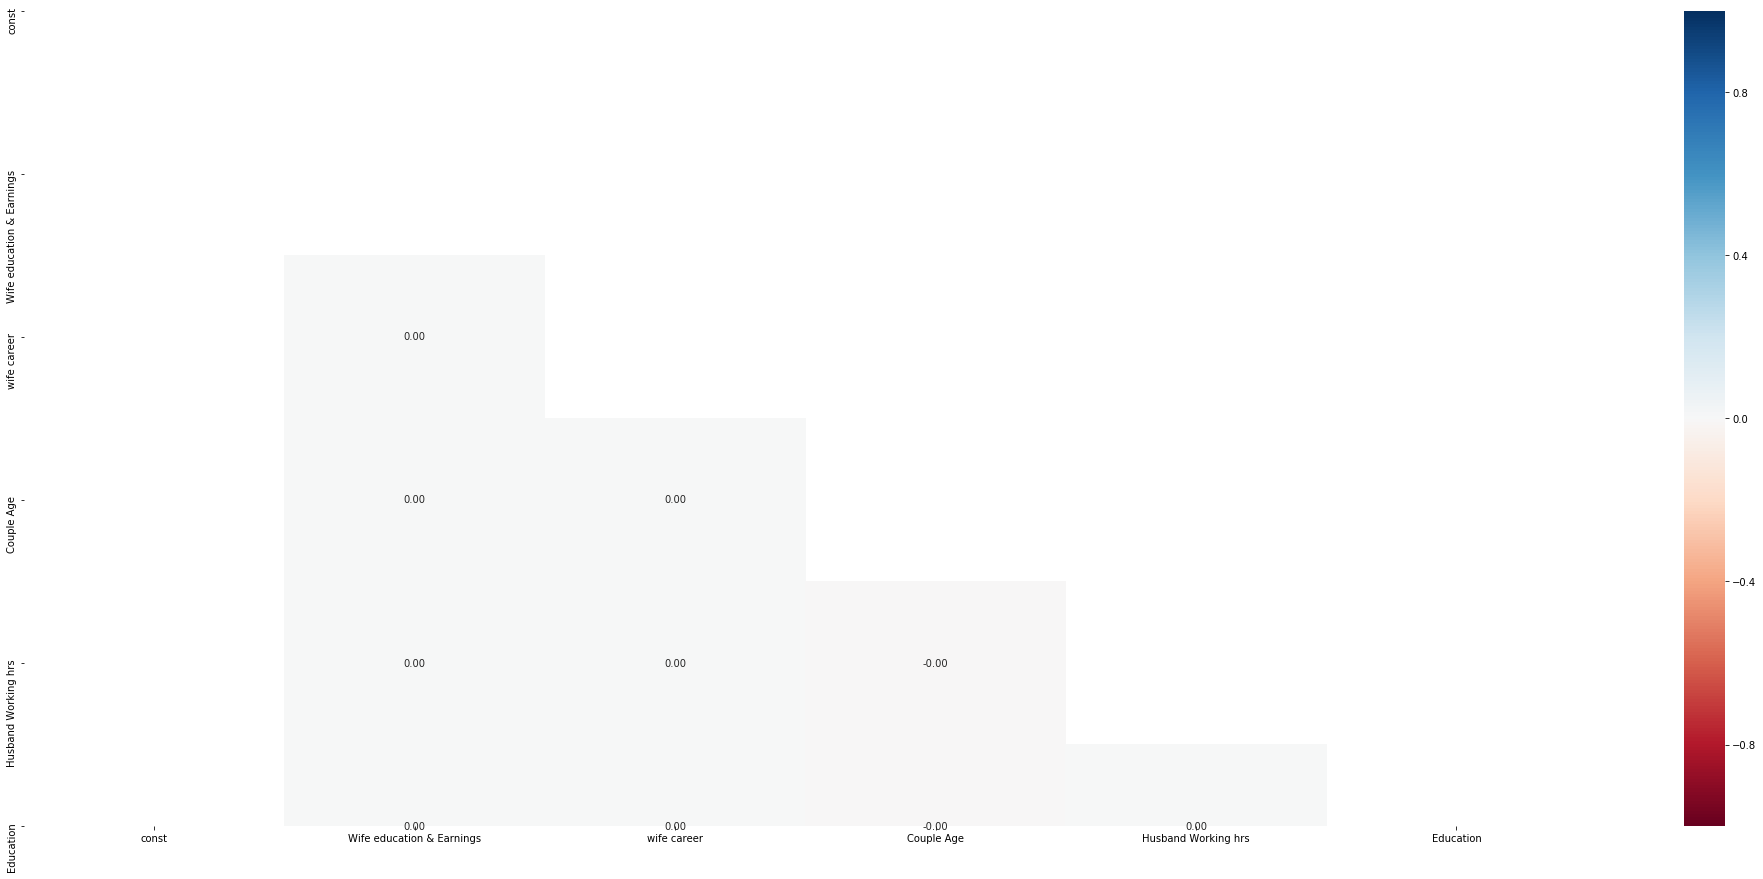

In [93]:
corr=pc.factors.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(35, 15))
sns.heatmap(pc.factors.corr(), fmt='.2f',cmap='RdBu',vmin=-1,vmax=1,mask=mask,annot=True)
plt.show()

### 2.5 Multiple Linear Regression after PCA

In [94]:
model = sm.OLS(Y,pc.factors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           2.33e-88
Time:                        14:17:32   Log-Likelihood:                -7153.3
No. Observations:                 695   AIC:                         1.432e+04
Df Residuals:                     689   BIC:                         1.435e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.192e+04    272.057     80.569      0.000    2.14e+04    2.25e+04
Wife education & Earnings -1.127e+05   7172.199    -15.707      0.000   -1.27e+05   -9.86e+04
wife career               -1694.9686   7172.199     -0.236      0.813   -1.58e+04    1.24e+04
Couple Age                -8.638e+04   7172.199    -12.044      0.000      -1e+05   -7.23e+04
Husband Working hrs       -7103.9073   7172.199     -0.990      0.322   -2.12e+04    6978.081
Education                 -9.685e+04   7172.199    -13.504      0.000   -1.11e+05   -8.28e+04
==============================================================================
Omnibus:                      114.968   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.869
Skew:                           0.933   Prob(JB):                     3.67e-52
Kurtosis:                       5.168   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
ypred_pca = model.predict(pc.factors)
print(ypred_pca)

0      18153.136554
1      18319.533827
2      19812.987802
3      16451.778728
4      24124.720026
           ...     
748    26672.330169
749    14670.494470
750    15128.868299
751    19878.546419
752    17347.994120
Length: 695, dtype: float64


In [96]:
from sklearn import metrics
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y,ypred_pca)))

RMSE: 7141.172598816365


### 2.6 
Comment on the Model thus built using the Principal Components and with 'FamilyIncome'.

### 2.7  
 Mention the business implication and interpretation of the models.

# Problem 1

In [5]:
from scipy.stats import shapiro,levene,mannwhitneyu,wilcoxon
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

In [6]:
df=pd.read_csv('Fever.csv')
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [ ]:
df.shape

In [163]:
df['B']= pd.Categorical(df['B'])
df['A']= pd.Categorical(df['B'])

In [100]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
A,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
B,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
Volunteer,36.0,2.500000,1.133893,1.0,1.750,2.5,3.250,4.0
Relief,36.0,7.183333,3.272090,2.3,4.675,6.0,9.325,13.5


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [102]:
df['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [103]:
df[['A','Relief']].head()

,A,Relief
0,1,2.4
1,1,2.7
2,1,2.3
3,1,2.5
4,1,4.6


In [104]:
df['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [105]:
df['Relief'].value_counts().head()

9.1    2
8.7    2
4.6    2
5.8    1
4.9    1
Name: Relief, dtype: int64

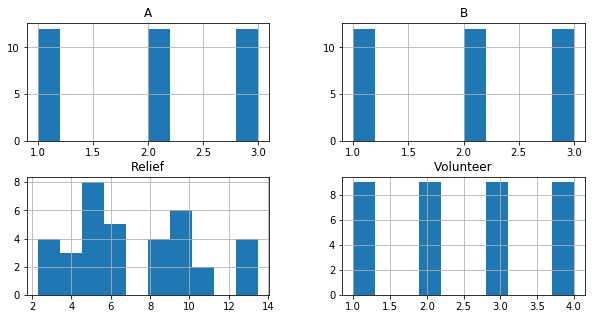

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
df.hist();

### 1.1 Null Hypothesis and Alternate Hypothesis for A and B Ingredients

Null Hypothesis and Alternate Hypothesis for A and B Ingredients

H0- There is no impact on ReliefHours  due to ingredient A (𝐴𝑙𝑙𝑡ℎ𝑒𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛𝑚𝑒𝑎𝑛𝑠𝑎𝑟𝑒𝑒𝑞𝑢𝑎𝑙 ie u1=u2=u3)


H1- There is a significant impact on ReliefHours  due to ingredient A (𝐴𝑡𝑙𝑒𝑎𝑠𝑡𝑜𝑛𝑒𝑜𝑓𝑡ℎ𝑒𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛𝑚𝑒𝑎𝑛𝑠𝑎𝑟𝑒𝑢𝑛𝑒𝑞𝑢𝑎𝑙.)


H0- There is no impact on ReliefHours  due to ingredient B (𝐴𝑙𝑙𝑡ℎ𝑒𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛𝑚𝑒𝑎𝑛𝑠𝑎𝑟𝑒𝑒𝑞𝑢𝑎𝑙 ie u1=u2=u3)


H1- There is a significant impact on ReliefHours  due to ingredient B (𝐴𝑡𝑙𝑒𝑎𝑠𝑡𝑜𝑛𝑒𝑜𝑓𝑡ℎ𝑒𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛𝑚𝑒𝑎𝑛𝑠𝑎𝑟𝑒𝑢𝑛𝑒𝑞𝑢𝑎𝑙.)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


### 1.2 One way anova for A variable

In [19]:
a1=df[df["A"] == 1][["Relief"]]
a2=df[df["A"] == 2][["Relief"]]
a3=df[df["A"] == 3][["Relief"]]

In [20]:
a1.head()

,Relief
0,2.4
1,2.7
2,2.3
3,2.5
4,4.6


In [11]:
shapiro(a1)

(0.7686296701431274, 0.004211828112602234)

In [12]:
shapiro(a2)

(0.728706955909729, 0.001616060733795166)

In [13]:
shapiro(a3)

(0.847996175289154, 0.03468279168009758)

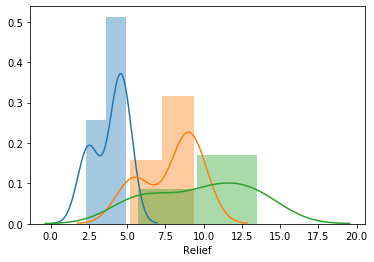

In [14]:
sns.distplot(df.loc[df['A'] == 1]['Relief'])
sns.distplot(df.loc[df['A'] == 2]['Relief'])
sns.distplot(df.loc[df['A'] == 3]['Relief'])
plt.show()

#### From the above shapiro test  we can find the data is not normal as shapiro test  reject null hypothesis H0 

In [15]:
levene(a1.Relief,a2.Relief,a3.Relief)

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

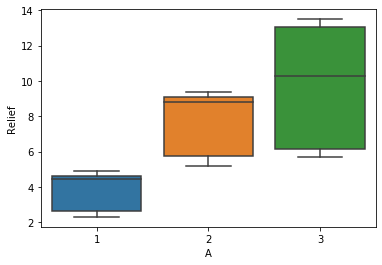

In [16]:
sns.boxplot(df['A'],df['Relief'])
plt.show()

#### As the P-value for both Shapiro and Levene test are below 0.05 , i this case we  reject Null Hypothesis and we accept Alternate Hypothesis, so the dataset is not Normally distributed . 

### So we are going for the Non parametric test


In [21]:
unique = df['A'].unique()
unique

array([1, 2, 3], dtype=int64)

In [22]:
kruskalwallis(np.array(df['Relief'][df['A'] == unique[0]]),
              np.array(df['Relief'][df['A'] == unique[1]]),
              np.array(df['Relief'][df['A'] == unique[2]]))

KruskalResult(statistic=25.645036693704128, pvalue=2.6992992738200464e-06)

#### From the Kriskalwallis test we can find that the P value is less than 0.05 , so we are rejecting H0 , so the population means are not equal.

In [162]:
mc = MultiComparison(df['Relief'], df['A'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------
[1 2 3]


### 1.3 One way anova for B variable

In [114]:
b1=df[df["B"] == 1][["Relief"]]
b2=df[df["B"] == 2][["Relief"]]
b3=df[df["B"] == 3][["Relief"]]

In [155]:
#shapiro(b1)

In [156]:
#shapiro(b2)


In [157]:
#shapiro(b3)

In [148]:
# or directly below code for shapiro test
for name in df['B'].unique():
    print (shapiro(df['Relief'][df['B'] == name]))

(0.7656338810920715, 0.003910908009856939)
(0.8065383434295654, 0.01112875435501337)
(0.8446834087371826, 0.031581711024045944)


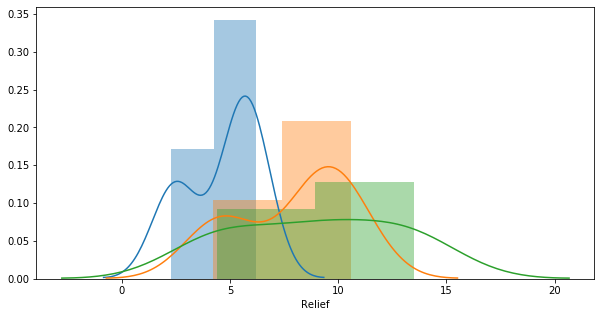

In [152]:
sns.distplot(df.loc[df['B'] == 1]['Relief'])
sns.distplot(df.loc[df['B'] == 2]['Relief'])
sns.distplot(df.loc[df['B'] == 3]['Relief'])
plt.show()

In [118]:
levene(b1.Relief,b2.Relief,b3.Relief)

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

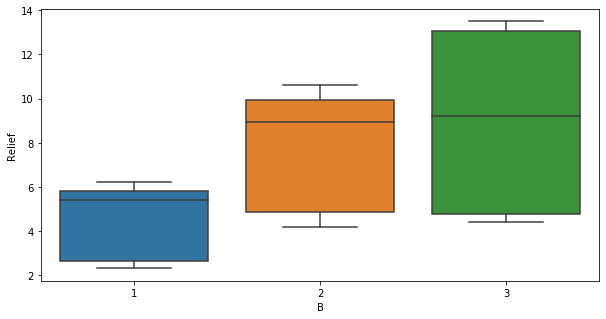

In [154]:
sns.boxplot(df['B'],df['Relief'])
plt.show()

#### As the P-value for Levene test is below 0.05 , the variance is not equal so in  this case we failed to reject Null Hypothesis and we accept Alternate Hypothesis



In [146]:
unique = df['B'].unique()
unique

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [147]:
kruskalwallis(np.array(df['Relief'][df['B'] == unique[0]]),
              np.array(df['Relief'][df['B'] == unique[1]]),
              np.array(df['Relief'][df['B'] == unique[2]]))
              

KruskalResult(statistic=7.3755954680056695, pvalue=0.025027057634532866)

#### From the Kriskalwallis test we can find that the P value is less than 0.05 , so we are rejecting H0 , so the population means are not equal.

In [149]:
## multicomparison test is done only when we reject H0 in one way annova

mc = MultiComparison(df['Relief'], df['B'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------
[1 2 3]


### Problem 1.5 (two way Annova)

In [120]:
formula = 'Relief ~ C(A)+C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


### Problem 1.4 (Interaction test)

In [121]:
#Interaction Test
formula = 'Relief ~ C(A)+C(B)+C(A):C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


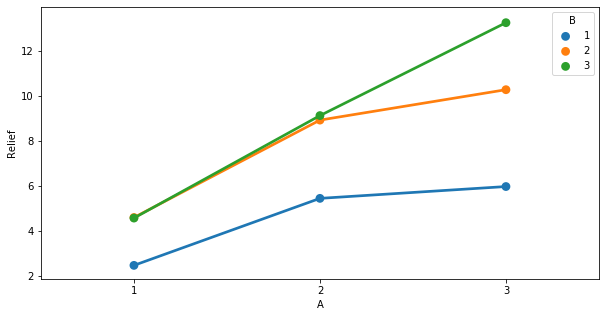

In [125]:
sns.pointplot(x = "A",y = "Relief",data = df,hue='B',ci=None) 
 
plt.show() ## from the below result we can come to a conclusion that there is a clear interaction between the variables.

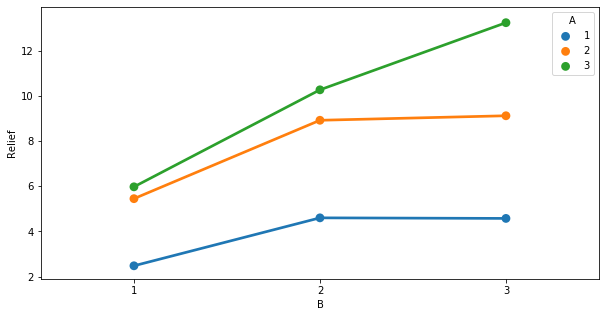

In [126]:
sns.pointplot(x = "B",y = "Relief",data = df,hue='A',ci=None)

### 1.6
Mention the business implications of performing ANOVA for this particular case study.